In [2]:
import pandas as pd
import numpy as np
import os
import umap
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
import sys
from PIL import Image

In [3]:
quantified_directory = '/home/mass_spec_img/mass_spec_img/data/quantified_1631_excluded'
df = pd.DataFrame()
y_max = 0
slide_names = ['SQ1632', 'SQ1633', 'SQ1634', 'SQ1635', 'SQ1636']
tissue_names = ['S1', 'S2', 'S3', 'S4']
for s in slide_names:
    slide_df = pd.DataFrame()
    for t in tissue_names:
        st = s+t+"_quantified.tsv"
        sub_df = pd.read_csv(os.path.join(quantified_directory, st), sep="\t")
        scaler = MinMaxScaler()
        for column in sub_df.columns[2:]:
            sub_df[column] = scaler.fit_transform(sub_df[[column]])
        slide_df = pd.concat([slide_df, sub_df], axis=0)
    slide_df['Y'] += y_max
    y_max = slide_df['Y'].max()
    df = pd.concat([df, slide_df], axis=0)
#df.to_csv("/home/mass_spec_img/mass_spec_img/data/quantified/SQ1631_1636_PCA.tsv", sep="\t", index=False)




In [4]:
df.head()

X    Y  mz772.526_mob1.43  mz826.575_mob1.48  mz713.451_mob1.36  \
0  1220  457           0.070710           0.248208           0.018146   
1  1221  457           0.066973           0.234767           0.019443   
2  1222  457           0.072722           0.202509           0.007777   
3  1223  457           0.069560           0.230287           0.006481   
4  1224  457           0.051164           0.204301           0.000000   

   mz534.292_mob1.15  mz820.519_mob1.45  mz770.505_mob1.42  mz824.55_mob1.47  \
0           0.160173           0.228304           0.348571          0.337736   
1           0.233766           0.214953           0.302857          0.299057   
2           0.303030           0.245661           0.321429          0.314151   
3           0.220779           0.238985           0.325714          0.335849   
4           0.103896           0.253672           0.298571          0.278302   

   mz773.524_mob1.44  ...  mz738.449_mob1.36  mz792.919_mob1.19  \
0           0.051873  ...           0.034810           0.240566   
1           0.081412  ...           0.066456           0.386792   
2           0.068444  ...           0.034810           0.405660   
3           0.075648  ...           0.063291           0.250000   
4           0.038905  ...           0.031646           0.278302   

   mz823.544_mob1.46  mz791.921_mob1.18  mz801.559_mob1.46  mz968.928_mob1.32  \
0           0.364486           0.353234           0.133971           0.301205   
1           0.294393           0.333333           0.224880           0.228916   
2           0.322430           0.333333           0.215311           0.475904   
3           0.364486           0.293532           0.234450           0.271084   
4           0.322430           0.268657           0.167464           0.379518   

   mz974.544_mob1.54  mz745.932_mob1.15  mz926.884_mob1.29  mz553.946_mob1.0  
0           0.366279           0.540541           0.000000          0.140845  
1           0.319767           0.540541           0.234043          0.000000  
2           0.238372           0.342342           0.308511          0.140845  
3           0.174419           0.306306           0.414894          0.492958  
4           0.313953           0.288288           0.340426          0.577465  

[5 rows x 44 columns]

In [5]:

data = df.iloc[:, 2:]
pca_scaler = PCA(n_components=3)
data = pca_scaler.fit_transform(data)
# get the coordinates of the pixels for the output image
xmin, xmax = df['X'].min(), df['X'].max()
ymin, ymax = df['Y'].min(), df['Y'].max()
df['X'] -= xmin
df['Y'] -= ymin

width = xmax - xmin + 1
height = ymax - ymin + 1

In [6]:
feature_weights = pd.DataFrame(
    pca_scaler.components_.T,  # Transpose to get features as rows, PCs as columns
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    index=df.columns[2:]
)

# Get the transformed data points
# This shows each original data point in the new PC space
transformed_df = pd.DataFrame(
    data,
    columns=[f'PC{i+1}' for i in range(pca_scaler.n_components_)]
)

# If you want to see how much each PC explains the variance
explained_variance = pd.DataFrame({
    'PC': [f'PC{i+1}' for i in range(pca_scaler.n_components_)],
    'Explained Variance Ratio': pca_scaler.explained_variance_ratio_,
    'Cumulative Variance Ratio': np.cumsum(pca_scaler.explained_variance_ratio_)
})


In [7]:
# Display the results
print("Feature loadings for each principal component:")
print(feature_weights)
print("\nTransformed data points:")
print(transformed_df.head())
print("\nExplained variance:")
print(explained_variance)

Feature loadings for each principal component:
                        PC1       PC2       PC3
mz772.526_mob1.43  0.093789  0.234438 -0.077993
mz826.575_mob1.48  0.160252 -0.041849  0.073721
mz713.451_mob1.36  0.066070  0.142790  0.000378
mz534.292_mob1.15  0.070190  0.071951 -0.014333
mz820.519_mob1.45  0.136727 -0.054520  0.114352
mz770.505_mob1.42  0.147428  0.327861 -0.255834
mz824.55_mob1.47   0.214544 -0.057250  0.063005
mz773.524_mob1.44  0.086401  0.182166 -0.036267
mz799.543_mob1.46  0.242198  0.096738 -0.096264
mz796.525_mob1.43  0.217142  0.034559 -0.071324
mz848.558_mob1.48  0.166645 -0.111218  0.212696
mz761.453_mob1.39  0.097944 -0.007413  0.119039
mz744.495_mob1.4   0.091674  0.270555 -0.146784
mz739.466_mob1.37  0.179288  0.069771  0.019705
mz741.529_mob1.42  0.096244 -0.138312  0.083669
mz827.576_mob1.48  0.120817 -0.038823  0.087480
mz851.642_mob1.53  0.080878  0.011342  0.121752
mz821.531_mob1.45  0.141890 -0.051908  0.122582
mz737.445_mob1.36  0.160584  0.083339  0.

Loadings:
[[ 5.50393365e-02  9.59648126e-02 -2.36765108e-02]
 [ 9.40423121e-02 -1.71305180e-02  2.23795969e-02]
 [ 3.87727559e-02  5.84497285e-02  1.14723603e-04]
 [ 4.11905071e-02  2.94526544e-02 -4.35121266e-03]
 [ 8.02371691e-02 -2.23174043e-02  3.47141580e-02]
 [ 8.65170693e-02  1.34206886e-01 -7.76644884e-02]
 [ 1.25903287e-01 -2.34346285e-02  1.91266952e-02]
 [ 5.07037862e-02  7.45679126e-02 -1.10095878e-02]
 [ 1.42131910e-01  3.95986199e-02 -2.92232985e-02]
 [ 1.27428119e-01  1.41465158e-02 -2.16521858e-02]
 [ 9.77943098e-02 -4.55262349e-02  6.45689827e-02]
 [ 5.74773793e-02 -3.03439635e-03  3.61372130e-02]
 [ 5.37979268e-02  1.10749003e-01 -4.45596385e-02]
 [ 1.05213768e-01  2.85600772e-02  5.98205259e-03]
 [ 5.64798951e-02 -5.66168725e-02  2.53996588e-02]
 [ 7.09002843e-02 -1.58918934e-02  2.65567033e-02]
 [ 4.74627090e-02  4.64261447e-03  3.69606692e-02]
 [ 8.32667032e-02 -2.12479356e-02  3.72126011e-02]
 [ 9.42372251e-02  3.41141699e-02  7.85120958e-03]
 [ 1.29109479e-01  9.

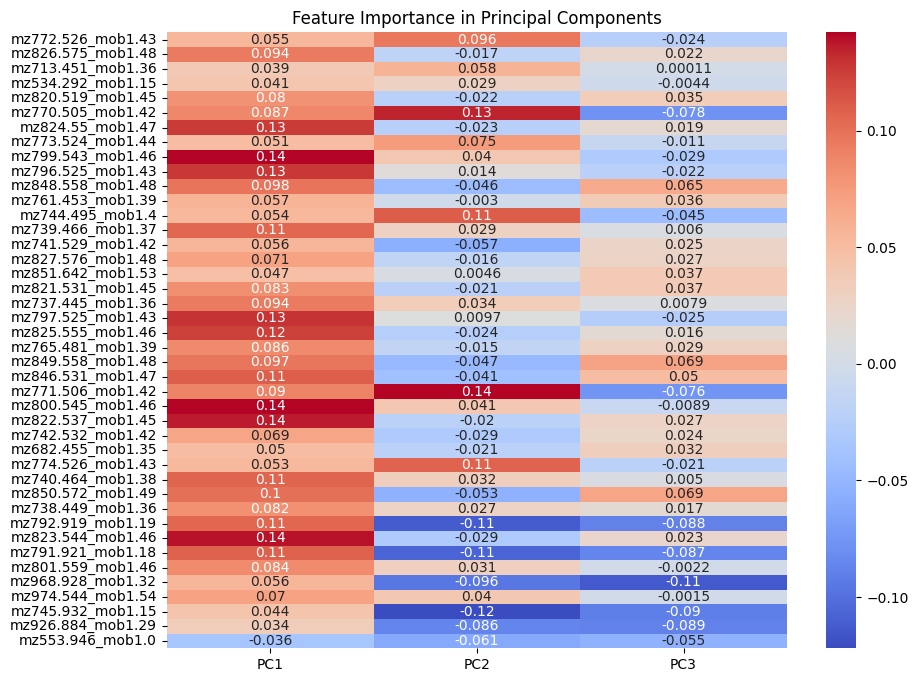

In [8]:
import seaborn as sns
loadings = pca_scaler.components_.T * np.sqrt(pca_scaler.explained_variance_)
print("Loadings:")
print(loadings)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(loadings, annot=True, cmap='coolwarm', xticklabels=['PC1', 'PC2', 'PC3'], yticklabels=df.columns[2:])
plt.title('Feature Importance in Principal Components')
plt.show()

In [9]:
for i in range(data.shape[1]):
    v = data[:, i]
    data[:, i] = (v - v.min()) / (v.max() - v.min())
img = Image.new('RGB', (width, height), color='black')


red_color = np.array((255, 0, 0))
cred_color = np.array((0, 255, 255))
green_color = np.array((0, 255, 0))
cgreen_color = np.array((255, 0, 255))
blue_color = np.array((0, 0, 255))
cblue_color = np.array((255, 255, 0))

xp = 1

for r in range(data.shape[0]):
    the_color = np.zeros(3)
    i = 0
    rval = (data[r,i] - 0.5) / 0.5
    if rval > 0:
        the_color += rval * red_color
    else:
        the_color += (-1 * rval) * cred_color
    i = 1
    gval = (data[r,i] - 0.5) / 0.5
    if gval > 0:
        the_color += gval * green_color
    else:
        the_color += (-1 * gval) * cgreen_color
    i = 2
    bval = (data[r,i] - 0.5) / 0.5
    if bval > 0:
        the_color += bval * blue_color
    else:
        the_color += (-1 * bval) * cblue_color

    the_color /= (255 * 3)
    the_color *= 255
    for i in range(xp):
        for j in range(xp):
            img.putpixel((df.iloc[r,0]*xp + i,df.iloc[r,1]*xp + j), tuple(np.int32(the_color)))

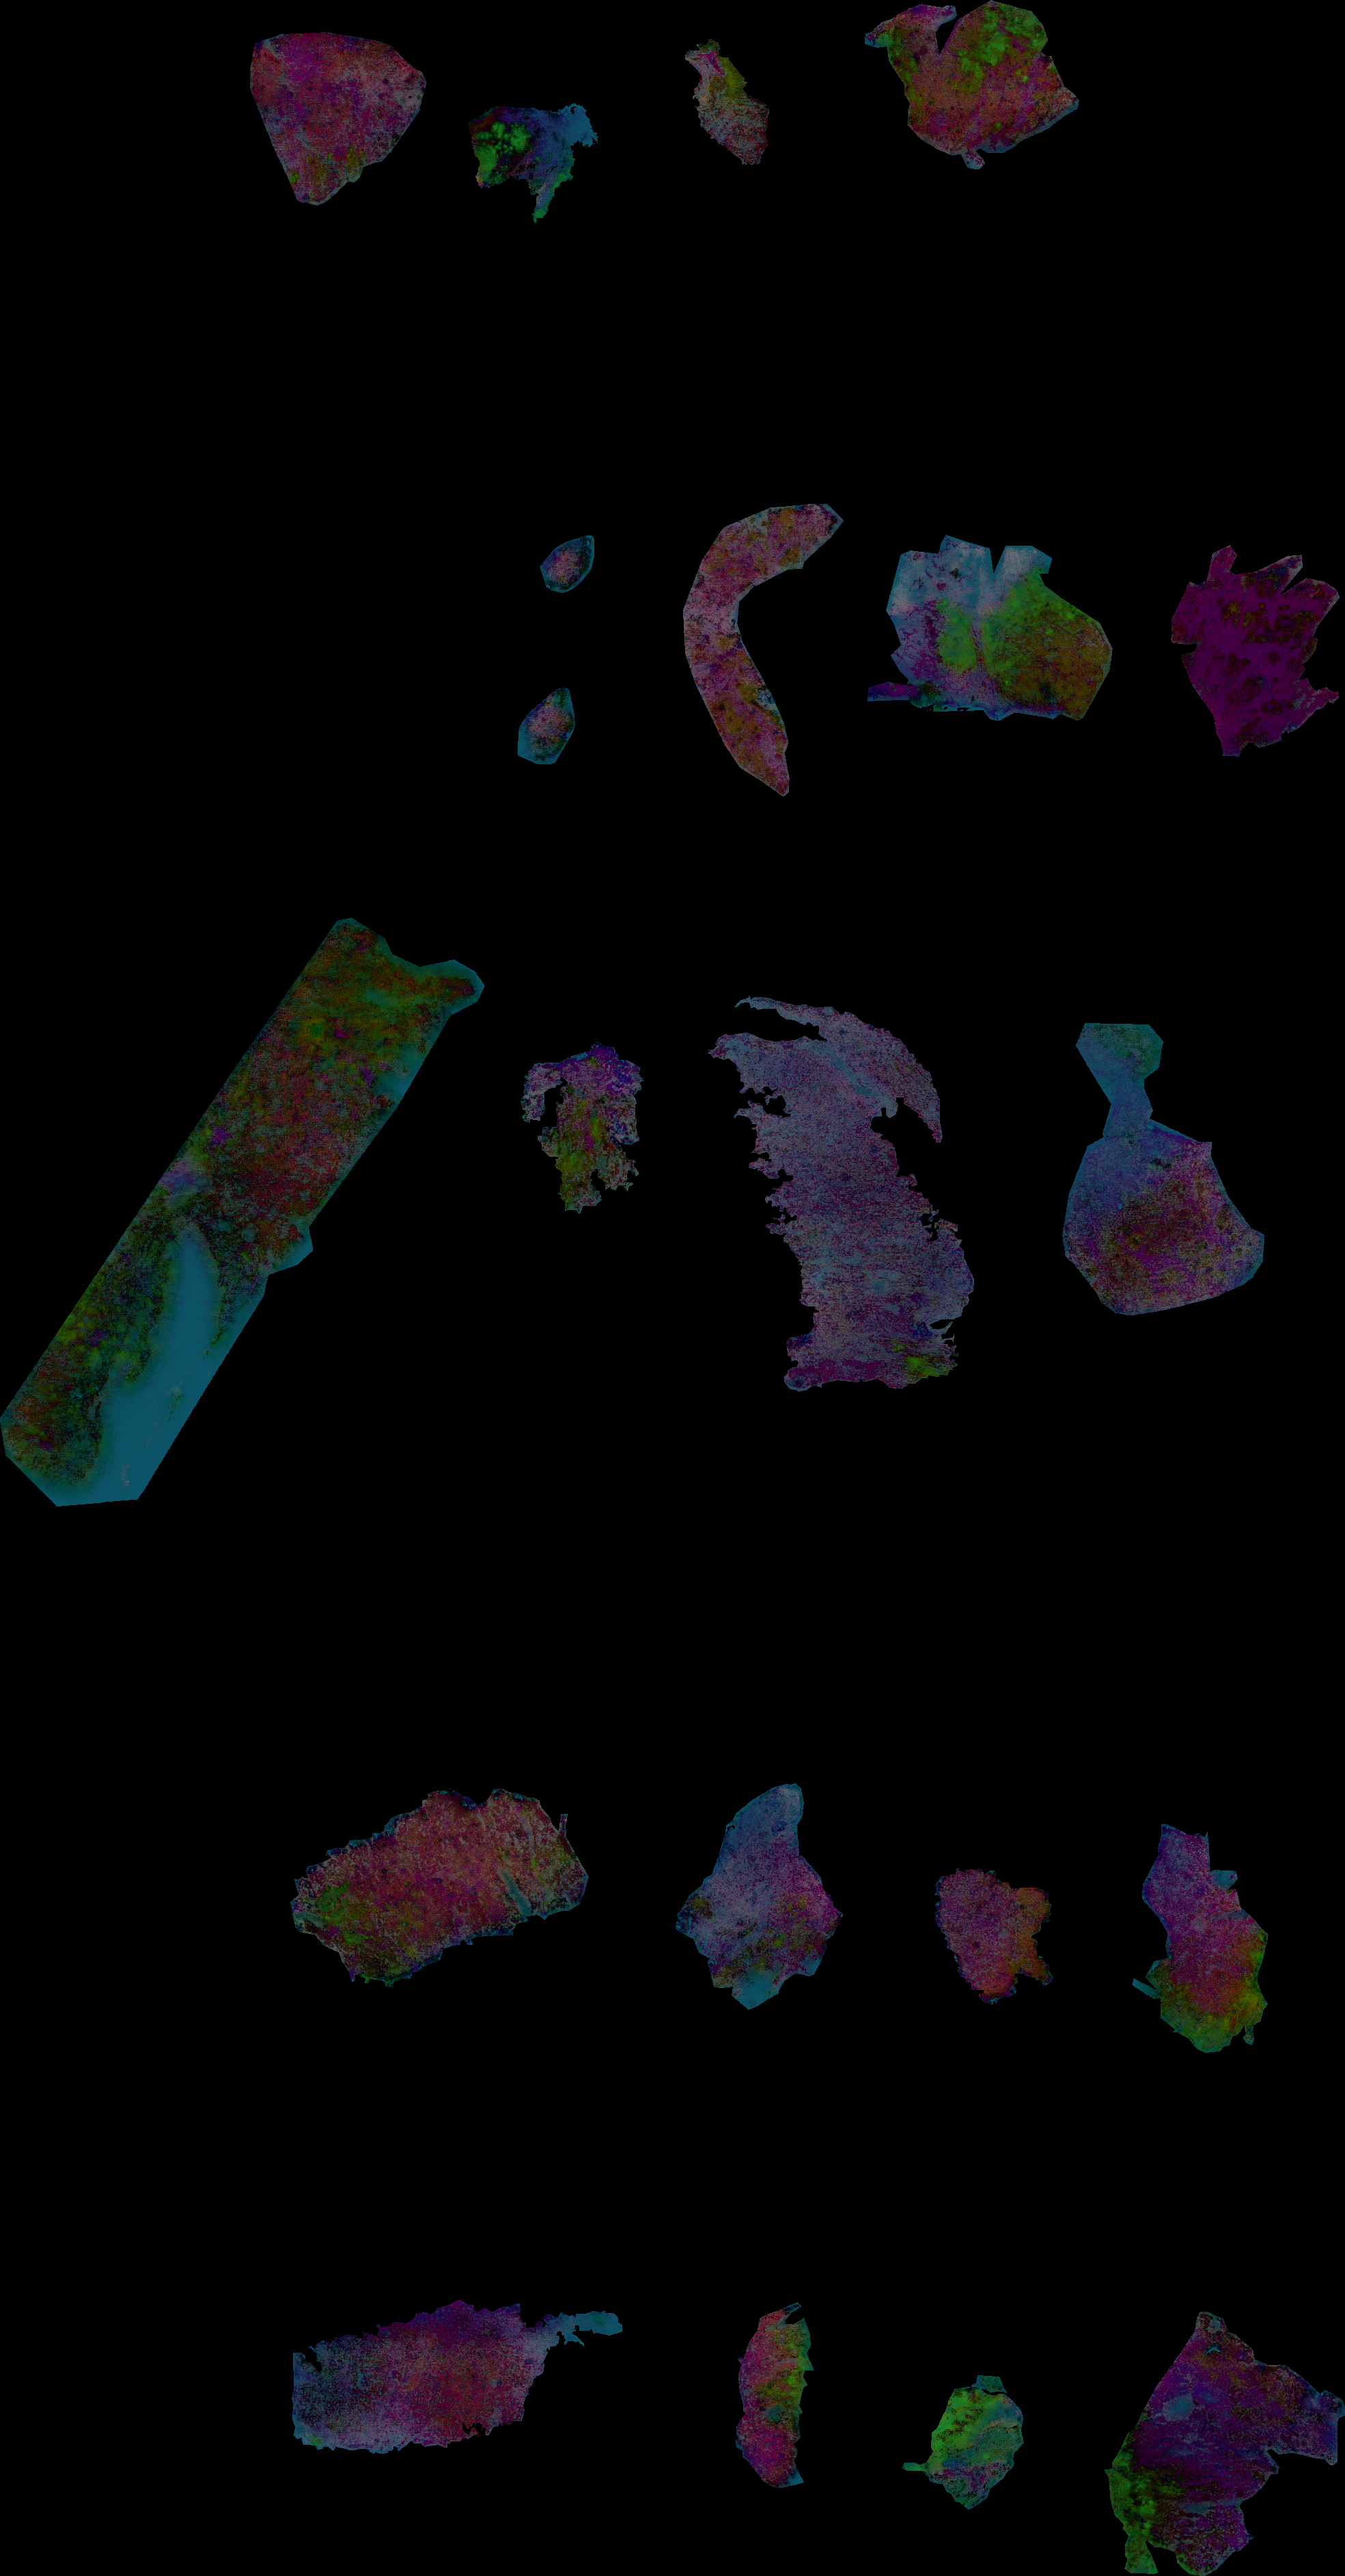

In [10]:
display(img)